# INTRODUCTION
This project focuses on building a machine learning model to predict whether a product will become a best-seller. Using e-commerce data such as product orders, customer details, review scores, and shipping costs, we aim to identify key factors that contribute to high sales.


In [ ]:
!pip install shap
!pip install javascript
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import javascript

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 16.3 MB/s eta 0:00:00


In [ ]:
# Load your data
data = pd.read_csv('/content/drive/MyDrive/cv/Randomized_Product_Data.csv')

In [ ]:
data.head() #First 5 rows of the dataset

,product_id,total_orders,average_review_score,total_freight_value,total_customers,is_best_seller
0,0011c512eb256aa0dbbb544d8dffcf6e,5,5.0,84.70,14,1
1,003128f981470c3e5a2e7445e4a771cd,3,5.0,55.62,13,1
2,003938452c98ff9ab28e9e7b4bfe97ab,9,3.0,112.14,25,0
3,0044d70d4e53450c0fbb8255446a797b,1,4.0,13.58,2,1
4,0075c14603d80515e20908c156ceb47b,4,3.0,83.20,35,0


In [ ]:
data.shape #Number of rows and columns

(1992, 6)

In [ ]:
data.info() #Type of data in each column and general information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1992 non-null   object 
 1   total_orders          1992 non-null   int64  
 2   average_review_score  1992 non-null   float64
 3   total_freight_value   1992 non-null   float64
 4   total_customers       1992 non-null   int64  
 5   is_best_seller        1992 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 93.5+ KB


In [ ]:
data.describe() #Data statistical analysis

,total_orders,average_review_score,total_freight_value,total_customers,is_best_seller
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,5.460843,4.110442,84.813424,25.646586,0.491466
std,2.916117,1.335619,53.942688,14.261587,0.500053
min,1.000000,1.000000,3.810000,1.000000,0.000000
25%,3.000000,4.000000,41.385000,13.000000,0.000000
50%,5.000000,5.000000,76.815000,26.000000,0.000000
75%,8.000000,5.000000,119.687500,38.000000,1.000000
max,10.000000,5.000000,293.400000,50.000000,1.000000


In [ ]:

# Convert product_id to an integer by creating a numeric hash
data['product_id'] = data['product_id'].apply(lambda x: abs(hash(x)) % (10 ** 8))

# Save the modified data back to a CSV file
data.to_csv('Randomized_Product_Data_with_numeric_product_id.csv', index=False)

print("The product_id column has been converted to numeric, and the data is saved.")

The product_id column has been converted to numeric, and the data is saved.


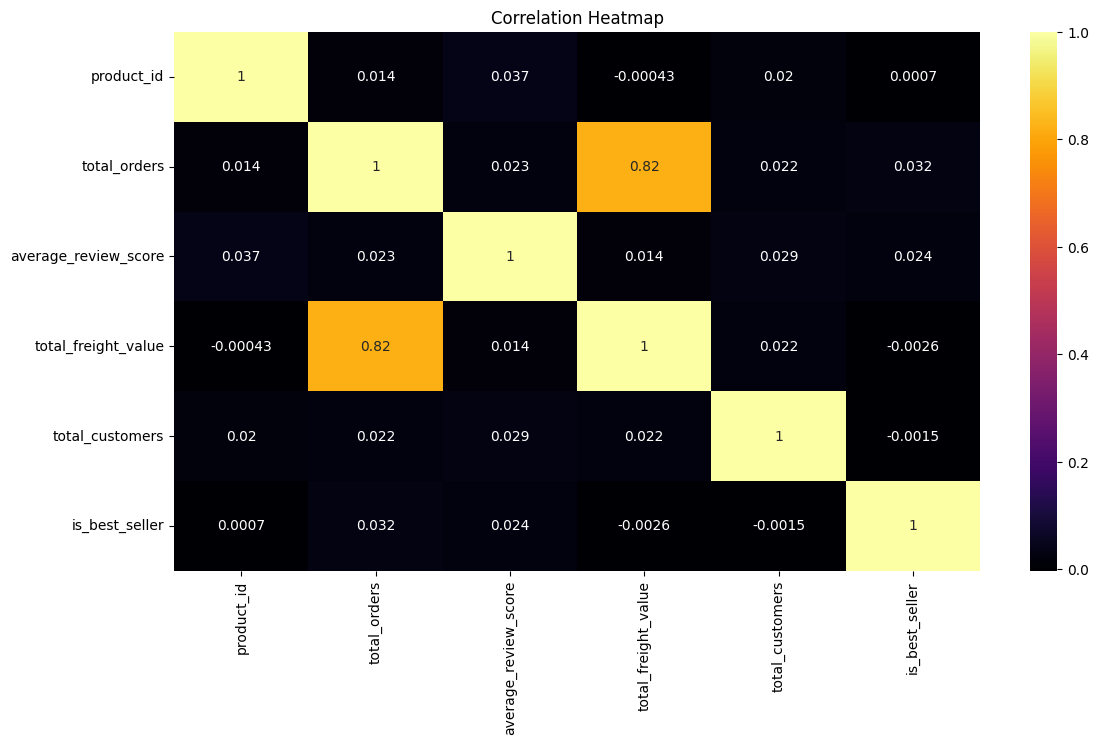

In [ ]:
plt.figure(figsize=(13, 7))
sns.heatmap(data.corr(), annot=True, cmap='inferno')
plt.title("Correlation Heatmap")
plt.show()

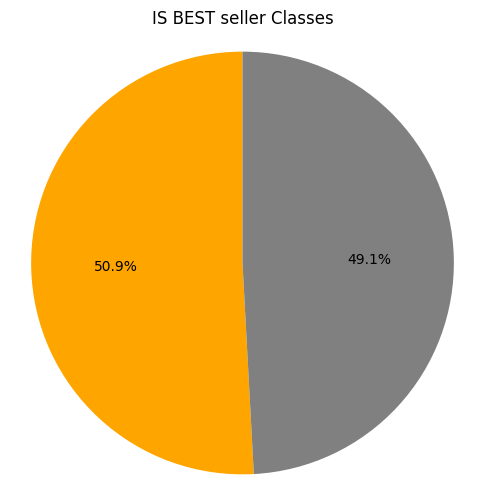

In [ ]:
# Count the number of instances for each class
class_counts = data['is_best_seller'].value_counts()

# Create labels for the pie chart
labels = ['Class 0', 'Class 1']
plt.figure(figsize=(6, 6))
plt.pie(class_counts, autopct='%1.1f%%', startangle=90, colors=['orange', 'grey'])
plt.title('IS BEST seller Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
x=data.drop('is_best_seller',axis=1)
y=data['is_best_seller']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=9)
result1=[]#will contain accuracy
result2=[]#will contain recall
result3=[]#will contain f1
result4=[]#will contain precision

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
#Accuracy = (TP + TN) / (TP + TN + FP + FN)
#Precision = TP / (TP + FP)
#Recall = TP / (TP + FN)
#F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [1000, 2000, 3000]
}
logr = LogisticRegression()
grid_search = GridSearchCV(logr, param_grid, cv=100)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
logr = LogisticRegression(**best_params)
logr.fit(x_train, y_train)
pred1=logr.predict(x_test)

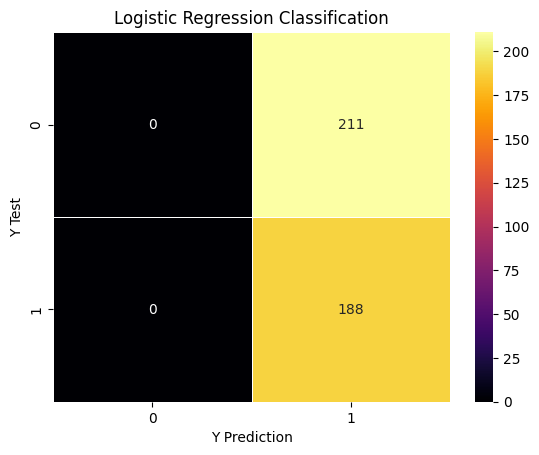

Accuracy = 0.47117794486215536 Recall = 1.0 F1 = 0.6405451448040886 Precision = 0.47117794486215536


In [ ]:
from sklearn.metrics import confusion_matrix

accuracy=accuracy_score(y_test,pred1)
recall=recall_score(y_test,pred1)
f1=f1_score(y_test,pred1)
precision=precision_score(y_test,pred1)
sns.heatmap(confusion_matrix(y_test,pred1),annot = True, linewidth=0.7, fmt ='g',cmap="inferno")
plt.title('Logistic Regression Classification')
plt.xlabel('Y Prediction')
plt.ylabel('Y Test')
plt.show()
result1.append(accuracy)
result2.append(recall)
result3.append(f1)
result4.append(precision)
print('Accuracy =',accuracy ,'Recall =',recall,'F1 =',f1 ,'Precision =',precision)

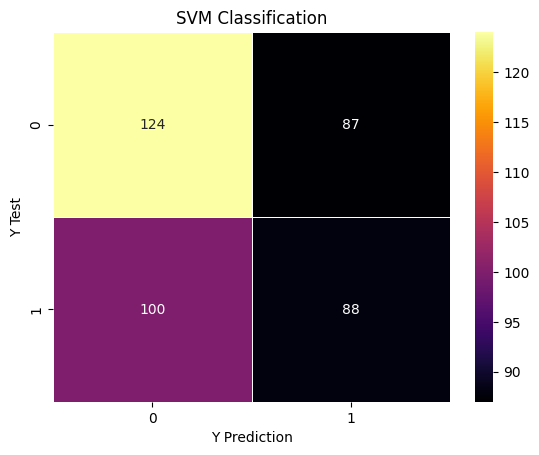

Accuracy = 0.531328320802005 Recall = 0.46808510638297873 F1 = 0.48484848484848486 Precision = 0.5028571428571429


In [ ]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the SVM model
svm_model = svm.SVC()

# Use a smaller subset of the training data for cross-validation
x_train_sample, _, y_train_sample, _ = train_test_split(
    x_train, y_train, train_size=0.3, stratify=y_train
)

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_sample)
x_test_scaled = scaler.transform(x_test)

# Use RandomizedSearchCV instead of GridSearchCV for faster hyperparameter search
random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model
random_search.fit(x_train_scaled, y_train_sample)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the final model using the best parameters
svm_model = svm.SVC(**best_params)
svm_model.fit(x_train_scaled, y_train_sample)

# Make predictions on the test set
pred2 = svm_model.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, pred2)
recall = recall_score(y_test, pred2)
f1 = f1_score(y_test, pred2)
precision = precision_score(y_test, pred2)

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, pred2), annot=True, linewidth=0.7, fmt='g', cmap="inferno")
plt.title('SVM Classification')
plt.xlabel('Y Prediction')
plt.ylabel('Y Test')
plt.show()

# Append results to lists
result1.append(accuracy)
result2.append(recall)
result3.append(f1)
result4.append(precision)

# Print the evaluation metrics
print('Accuracy =', accuracy, 'Recall =', recall, 'F1 =', f1, 'Precision =', precision)



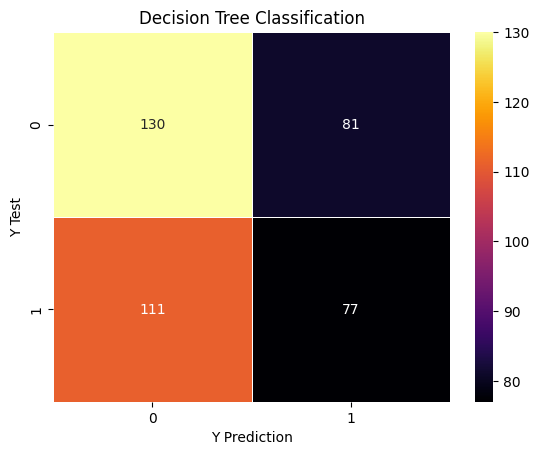

Accuracy = 0.518796992481203 Recall = 0.4095744680851064 F1 = 0.44508670520231214 Precision = 0.4873417721518987


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree Classifier model
dtc = DecisionTreeClassifier()

# Use a smaller subset of the training data for cross-validation (optional for faster performance)
x_train_sample, _, y_train_sample, _ = train_test_split(
    x_train, y_train, train_size=0.3, stratify=y_train
)

# Use RandomizedSearchCV instead of GridSearchCV for faster hyperparameter search
random_search = RandomizedSearchCV(
    estimator=dtc,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings sampled
    cv=5,  # Reduced cross-validation folds to 5
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train_sample, y_train_sample)

# Get the best parameters and best score from the randomized search
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the final Decision Tree model using the best parameters
dtc = DecisionTreeClassifier(**best_params)
dtc.fit(x_train_sample, y_train_sample)

# Predict the test data using the tuned Decision Tree classifier
pred4 = dtc.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, pred4)
recall = recall_score(y_test, pred4)
f1 = f1_score(y_test, pred4)
precision = precision_score(y_test, pred4)

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, pred4), annot=True, linewidth=0.7, fmt='g', cmap="inferno")
plt.title('Decision Tree Classification')
plt.xlabel('Y Prediction')
plt.ylabel('Y Test')
plt.show()

# Append results to lists
result1.append(accuracy)
result2.append(recall)
result3.append(f1)
result4.append(precision)

# Print the evaluation metrics
print('Accuracy =', accuracy, 'Recall =', recall, 'F1 =', f1, 'Precision =', precision)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


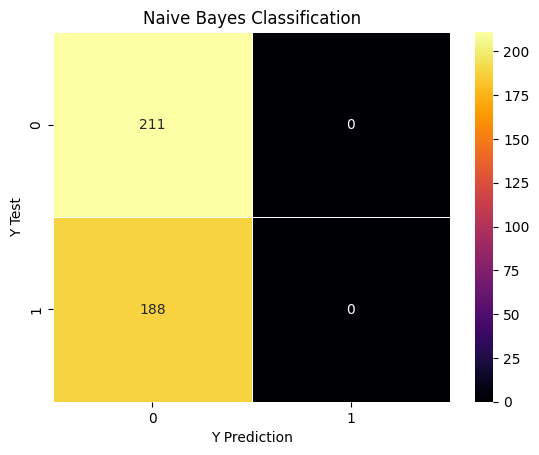

Accuracy = 0.5288220551378446 Recall = 0.0 F1 = 0.0 Precision = 0.0


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]]
}

# Create the Naive Bayes model
nb = GaussianNB()

# Use a smaller subset of the training data for cross-validation (optional for faster performance)
x_train_sample, _, y_train_sample, _ = train_test_split(
    x_train, y_train, train_size=0.3, stratify=y_train
)

# Use RandomizedSearchCV instead of GridSearchCV for faster hyperparameter search
random_search = RandomizedSearchCV(
    estimator=nb,
    param_distributions=param_grid,
    n_iter=4,  # Number of parameter settings sampled (in this case, 4 since we have limited options)
    cv=5,  # Reduced cross-validation folds to 5
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train_sample, y_train_sample)

# Get the best parameters and best score from the randomized search
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the final Naive Bayes model using the best parameters
nb = GaussianNB(**best_params)
nb.fit(x_train_sample, y_train_sample)

# Predict the test data using the tuned Naive Bayes model
pred3 = nb.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, pred3)
recall = recall_score(y_test, pred3)
f1 = f1_score(y_test, pred3)
precision = precision_score(y_test, pred3)

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, pred3), annot=True, linewidth=0.7, fmt='g', cmap="inferno")
plt.title('Naive Bayes Classification')
plt.xlabel('Y Prediction')
plt.ylabel('Y Test')
plt.show()

# Append results to lists
result1.append(accuracy)
result2.append(recall)
result3.append(f1)
result4.append(precision)

# Print the evaluation metrics
print('Accuracy =', accuracy, 'Recall =', recall, 'F1 =', f1, 'Precision =', precision)


In [ ]:
import pandas as pd

# Define the algorithms used so far
columns = ['SVM', 'Decision Tree', 'Naive Bayes','Logestic']

# Create the DataFrame using the results from the respective algorithms
Finalresult = pd.DataFrame({
    'Accuracies': result1,
    'Recalls': result2,
    'F1': result3,
    'Precisions': result4
})

# Display the result DataFrame
Finalresult


,Accuracies,Recalls,F1,Precisions
0,0.531328,0.468085,0.484848,0.502857
1,0.481203,0.409574,0.426593,0.445087
2,0.518797,0.409574,0.445087,0.487342
3,0.528822,0.000000,0.000000,0.000000


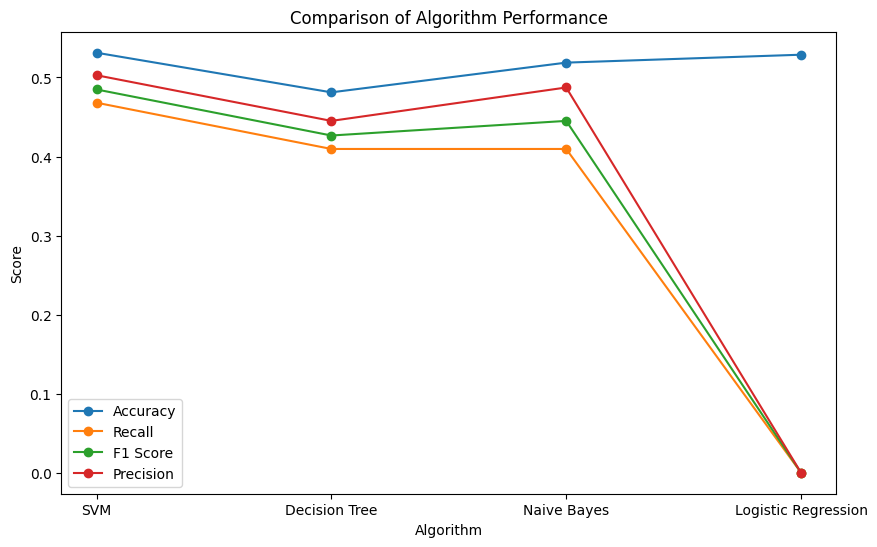

In [ ]:
import matplotlib.pyplot as plt

# Define the algorithms used so far (update this to match the length of your DataFrame)
algorithms = ['SVM', 'Decision Tree', 'Naive Bayes', 'Logistic Regression']  # Adjust this list

# Create a larger figure with a specified size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Accuracy, Recall, F1 Score, and Precision for each algorithm
plt.plot(algorithms, Finalresult['Accuracies'], label='Accuracy', marker='o')
plt.plot(algorithms, Finalresult['Recalls'], label='Recall', marker='o')
plt.plot(algorithms, Finalresult['F1'], label='F1 Score', marker='o')
plt.plot(algorithms, Finalresult['Precisions'], label='Precision', marker='o')

# Add a legend to identify each metric
plt.legend()

# Add title and axis labels
plt.title('Comparison of Algorithm Performance')
plt.xlabel('Algorithm')
plt.ylabel('Score')

# Show the plot
plt.show()
